## Question 1

Use [World Bank's Data Service](https://data.worldbank.org/) to retrieve

* Literacy rates of women (percentage of females ages 15 and above)
* Child mortality rate, under 5 year old. (per 1,000 live births)
* Gini index (Economic Inequality)

1. Plot each dataset for Turkey from earliest date available until this year.
2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods. 
3. Plot female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?
4. Plot female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?
5. Plot child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip

from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO
import wbdata
import yfinance as yf

# Solution 1.1

In [2]:
                                                                                                         
df_Literacy = wbdata.get_dataframe({"SE.ADT.LITR.FE.ZS":"Literacy rates of women"}, country="TUR").sort_values(by=['date'],ascending=True)
df_Mortality = wbdata.get_dataframe({"SH.DYN.MORT":"Child Mortality Rate"}, country="TUR").sort_values(by=['date'],ascending=True)
df_Gini = wbdata.get_dataframe({"SI.POV.GINI":"Gini index (Economic Inequality)"}, country="TUR").sort_values(by=['date'],ascending=True)

print(df_Literacy.head(),df_Mortality.head(),df_Gini.head())



      Literacy rates of women
date                         
1960                      NaN
1961                      NaN
1962                      NaN
1963                      NaN
1964                      NaN       Child Mortality Rate
date                      
1960                 257.0
1961                 249.3
1962                 241.4
1963                 233.5
1964                 225.7       Gini index (Economic Inequality)
date                                  
1960                               NaN
1961                               NaN
1962                               NaN
1963                               NaN
1964                               NaN


Text(0, 0.5, 'Rate')

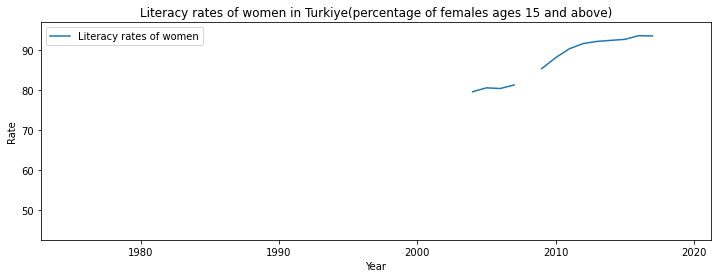

In [3]:
plot = df_Literacy.plot(figsize=(12,4))
plot.set_title("Literacy rates of women in Turkiye(percentage of females ages 15 and above)")
plot.set_xlabel("Year")
plot.set_ylabel("Rate")


Text(0, 0.5, 'Rate')

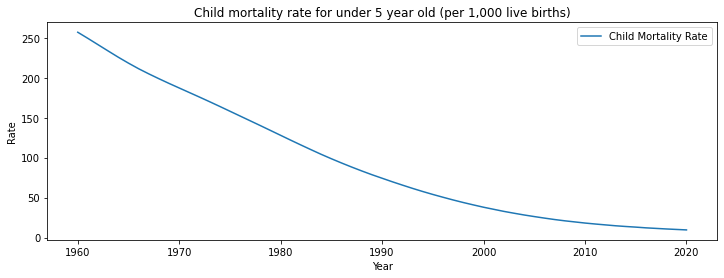

In [4]:
plot = df_Mortality.plot(figsize=(12,4))
plot.set_title("Child mortality rate for under 5 year old (per 1,000 live births)")
plot.set_xlabel("Year")
plot.set_ylabel("Rate")

Text(0, 0.5, 'Rate')

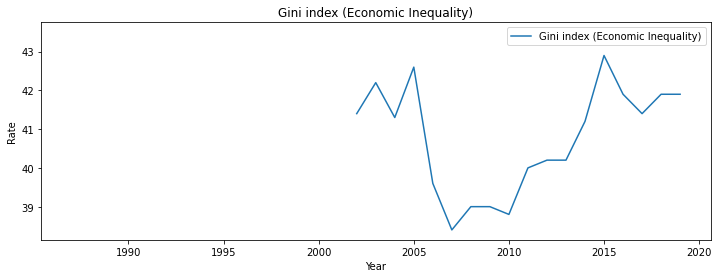

In [5]:
plot = df_Gini.plot(figsize=(12,4))
plot.set_title("Gini index (Economic Inequality)")
plot.set_xlabel("Year")
plot.set_ylabel("Rate")

# Solution 1.2

In [6]:
countries=["GRC","BGR","ROU","POL","SYR","IRN"]

df_LiteracyofAllCountries = wbdata.get_dataframe({"SE.ADT.LITR.FE.ZS":"Literacy rates of women"}, country=countries).sort_values(by=["country",'date'],ascending=True)
df_MortalityofAllCountries = wbdata.get_dataframe({"SH.DYN.MORT":"Child Mortality Rate"}, country=countries).sort_values(by=["country",'date'],ascending=True)
df_GiniofAllCountries = wbdata.get_dataframe({"SI.POV.GINI":"Gini index (Economic Inequality)"}, country=countries).sort_values(by=["country",'date'],ascending=True)
print(df_LiteracyofAllCountries,df_MortalityofAllCountries,df_GiniofAllCountries)

                           Literacy rates of women
country              date                         
Bulgaria             1960                      NaN
                     1961                      NaN
                     1962                      NaN
                     1963                      NaN
                     1964                      NaN
...                                            ...
Syrian Arab Republic 2017                      NaN
                     2018                      NaN
                     2019                      NaN
                     2020                      NaN
                     2021                      NaN

[372 rows x 1 columns]                            Child Mortality Rate
country              date                      
Bulgaria             1960                  55.4
                     1961                  48.8
                     1962                  44.0
                     1963                  40.8
                     1964

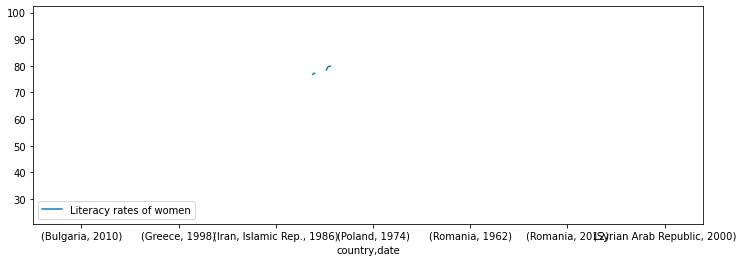

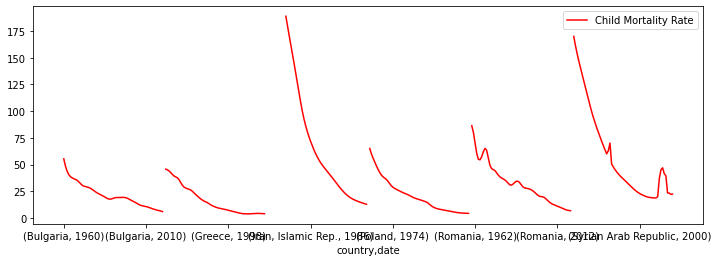

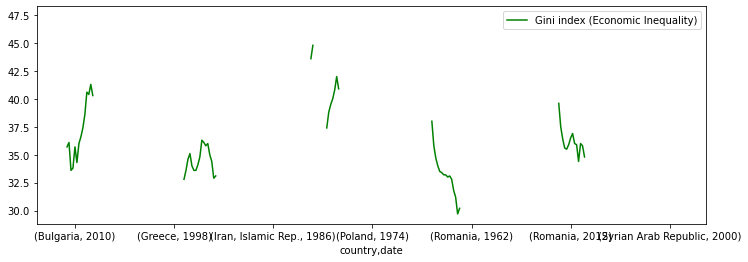

In [7]:
a = df_LiteracyofAllCountries.plot(figsize=(12,4))
b = df_MortalityofAllCountries.plot(figsize=(12,4),color="red")
c = df_GiniofAllCountries.plot(figsize=(12,4),color="green")


## Solution 1.3

      Literacy rates of women  Child Mortality Rate
date                                               
1960                      NaN                 257.0
1961                      NaN                 249.3
1962                      NaN                 241.4
1963                      NaN                 233.5
1964                      NaN                 225.7
...                       ...                   ...
2017                93.498268                  11.4
2018                      NaN                  10.7
2019                94.424042                  10.1
2020                      NaN                   9.5
2021                      NaN                   NaN

[62 rows x 2 columns]


<AxesSubplot:xlabel='date'>

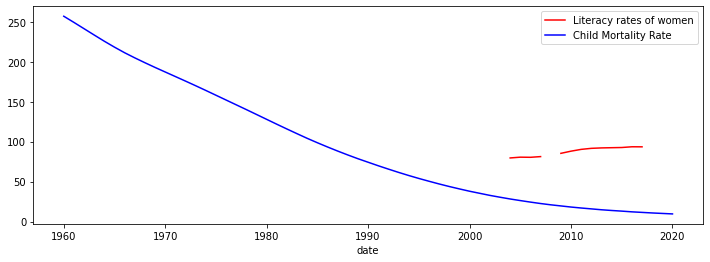

In [8]:
df_LiteracyAndMortality = wbdata.get_dataframe({"SE.ADT.LITR.FE.ZS":"Literacy rates of women","SH.DYN.MORT":"Child Mortality Rate"}, country="TUR").sort_values(by=['date'],ascending=True)
print(df_LiteracyAndMortality)
df_LiteracyAndMortality.plot(figsize=(12,4),color=["red","blue"])

Despite the absence of most data on the literacy part, it can be understood that there is an inverse relationship between them.

## Solution 1.4

      Literacy rates of women  Gini index (Economic Inequality)
date                                                           
1960                      NaN                               NaN
1961                      NaN                               NaN
1962                      NaN                               NaN
1963                      NaN                               NaN
1964                      NaN                               NaN
...                       ...                               ...
2017                93.498268                              41.4
2018                      NaN                              41.9
2019                94.424042                              41.9
2020                      NaN                               NaN
2021                      NaN                               NaN

[62 rows x 2 columns]


<AxesSubplot:xlabel='date'>

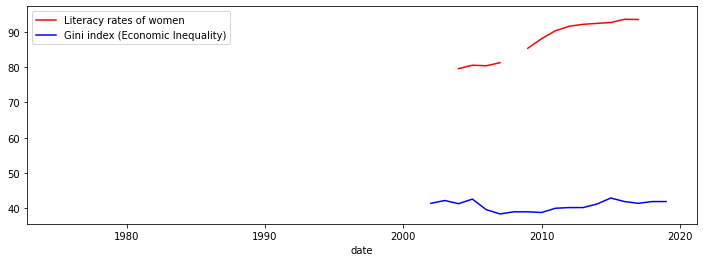

In [9]:
df_LiteracyAndGini = wbdata.get_dataframe({"SE.ADT.LITR.FE.ZS":"Literacy rates of women","SI.POV.GINI":"Gini index (Economic Inequality)"}, country="TUR").sort_values(by=['date'],ascending=True)
print(df_LiteracyAndGini)
df_LiteracyAndGini.plot(figsize=(12,4),color=["red","blue"])

Due to the lack of data before the year 2000, these two values seem to be parallel.

      Child Mortality Rate  Gini index (Economic Inequality)
date                                                        
1960                 257.0                               NaN
1961                 249.3                               NaN
1962                 241.4                               NaN
1963                 233.5                               NaN
1964                 225.7                               NaN
...                    ...                               ...
2017                  11.4                              41.4
2018                  10.7                              41.9
2019                  10.1                              41.9
2020                   9.5                               NaN
2021                   NaN                               NaN

[62 rows x 2 columns]


<AxesSubplot:xlabel='date'>

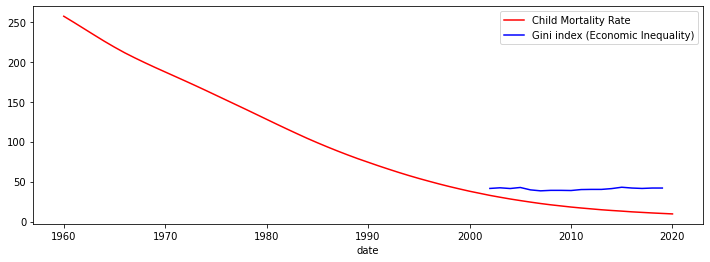

In [10]:
df_MortalityAndGini = wbdata.get_dataframe({"SH.DYN.MORT":"Child Mortality Rate","SI.POV.GINI":"Gini index (Economic Inequality)"}, country="TUR").sort_values(by=['date'],ascending=True)
print(df_MortalityAndGini)
df_MortalityAndGini.plot(figsize=(12,4),color=["red","blue"])

While the child mortality rate has decreased significantly since 1960, the Gini index continues in parallel after the year 2000.

## Question 2

Use Istanbul Municipality Data Server to retrieve the data on [Rail Transportation Data](https://data.ibb.gov.tr/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari).

1. Explore the dataset and explain each column.
2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.
3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe. Then plot it on a map of Istanbul. Use a disks of different sizes depending on the total number of passengers.
4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form

    {Station Name: probability that the specific age bracket uses the station}
5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.
6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

## Solution 2.1


In [11]:
with urlopen('https://data.ibb.gov.tr/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/7aec630d-2757-4da0-97f1-71b140abd818/download/2021-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.xlsx') as url:
    data = pd.DataFrame(pd.read_excel(url.read()))

data.head()
data["passanger_cnt"] = data["passanger_cnt"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17082 entries, 0 to 17081
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   passage_cnt        17082 non-null  float64
 1   passanger_cnt      17082 non-null  int32  
 2   transaction_year   17082 non-null  float64
 3   transaction_month  17082 non-null  int64  
 4   line               17082 non-null  object 
 5   station_name       17082 non-null  object 
 6   station_number     16962 non-null  object 
 7   town               17082 non-null  object 
 8   latitude           15987 non-null  object 
 9   longitude          15987 non-null  object 
 10  Age-Group          17082 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(7)
memory usage: 1.4+ MB


Passage_cnt = It includes the number of daily passage on the rail systems.
Passanger_cnt = It includes the number of daily passenger on the rail systems.
transaction_year = Contains the year of the measurement.
transaction_month = Contains the month of the measurement.
line = Contains rail system line information.
station_name = Contains the name of the station.
station_number = Contains station number information.
town = Contains the district information where the station is located.
latitude = Contains the altitude information where the station is located.
longitude = Contains the longitude information where the station is located.
age_group = Contains the age group information of the people who have made the transition.


## Solution 2.2

We need to convert latitude and latitude information to float. First, we convert it to float with the "to.numeric" function, and then we divide by 1e+13 to find its true value.

In [12]:

def ConvertToFloat():
    c = 1e+13
    data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')/c
    data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')/c
    return data['latitude'],data["longitude"]

ConvertToFloat()


(0        41.034056
 1        41.034056
 2        41.034056
 3        41.034056
 4        41.034056
            ...    
 17077    41.053333
 17078    41.053333
 17079    41.053333
 17080    41.053333
 17081    41.053333
 Name: latitude, Length: 17082, dtype: float64,
 0        28.992028
 1        28.992028
 2        28.992028
 3        28.992028
 4        28.992028
            ...    
 17077    28.933556
 17078    28.933556
 17079    28.933556
 17080    28.933556
 17081    28.933556
 Name: longitude, Length: 17082, dtype: float64)

## Solution 2.3

In [13]:

data = data.groupby('station_name')["passanger_cnt"].sum().reset_index()



# Question 3

For this question use Yahoo Finance API via [yfinance](https://pypi.org/project/yfinance/) library. Retrieve the data for Microsoft [MSFT], Apple [AAPL] and NASDAQ-100 [NDX]. from January 1, 2000.

1. Calculate the log of each series, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series. 
2. Merge the series you obtain in Step 1 into a single pandas dataframe.
3. Plot the histograms of results you obtained above (use 10 bins).
4. Plot all three series in a single plot to compare. Do you see a relationship? 
5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.

In [14]:
microsoft = yf.Ticker("MSFT")
apple = yf.Ticker("AAPL")
nasdaq = yf.Ticker("NDX")

start_date = "2000-1-1"

df_microsoft_After2000 = microsoft.history(start=start_date)
df_apple_After2000 = apple.history(start=start_date)
df_nasdaq_After2000 = nasdaq.history(start=start_date)

## Solution 3.1 and 3.2

In [15]:
df_microsoft_After2000['log_ret'] = np.log(df_microsoft_After2000.Close) - np.log(df_microsoft_After2000.Close.shift(1))
df_apple_After2000['log_ret'] = np.log(df_apple_After2000.Close) - np.log(df_apple_After2000.Close.shift(1))
df_nasdaq_After2000['log_ret'] = np.log(df_nasdaq_After2000.Close) - np.log(df_nasdaq_After2000.Close.shift(1))

df_microsoft_After2000.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,log_ret
Date,,,,,,,,
2000-01-03 00:00:00-05:00,36.810188,37.202202,35.124524,36.555378,53228400,0.0,0.0,NaN
2000-01-04 00:00:00-05:00,35.614537,36.731779,35.202922,35.320526,54119000,0.0,0.0,-0.034364
2000-01-05 00:00:00-05:00,34.850112,36.496574,34.301291,35.692944,64059600,0.0,0.0,0.010489
2000-01-06 00:00:00-05:00,35.183321,35.712541,33.987676,34.497295,54976600,0.0,0.0,-0.034072
2000-01-07 00:00:00-05:00,34.066076,35.202918,33.654460,34.948109,62013600,0.0,0.0,0.012983


## Solution 3.3

<AxesSubplot:title={'center':'Microsoft Log Return'}, ylabel='Frequency'>

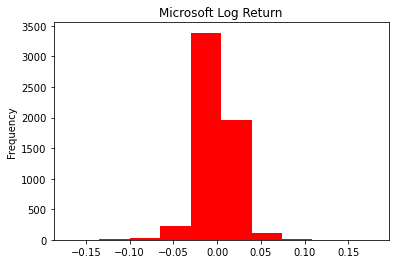

In [16]:
df_microsoft_After2000['log_ret'].plot.hist(bins=10,color="red",title="Microsoft Log Return")

<AxesSubplot:title={'center':'Apple Log Return'}, ylabel='Frequency'>

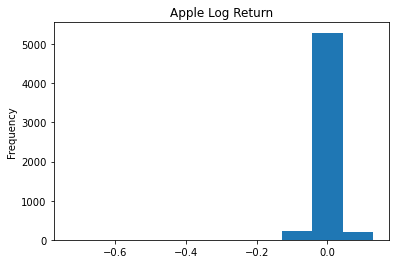

In [17]:
df_apple_After2000['log_ret'].plot.hist(bins=10,title="Apple Log Return")

<AxesSubplot:title={'center':'Nasdaq Log Return'}, ylabel='Frequency'>

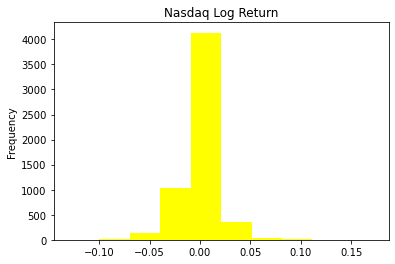

In [18]:
df_nasdaq_After2000['log_ret'].plot.hist(bins=10,color="yellow",title="Nasdaq Log Return")

## Solution 3.4

<AxesSubplot:title={'center':'Microsoft-Apple-Nasdaq Log Return'}, xlabel='Date'>

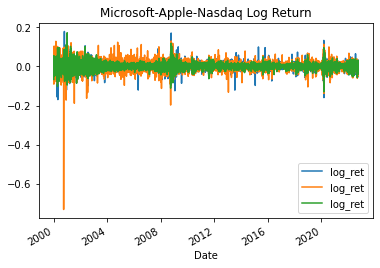

In [19]:
list = [df_microsoft_After2000['log_ret'],df_apple_After2000['log_ret'],df_nasdaq_After2000['log_ret']]
new_df = pd.DataFrame(list)
new_df.T.head(3)

new_df.T.plot(title="Microsoft-Apple-Nasdaq Log Return")


They seem to be compatible with each other, with exceptions.

## Solution 3.5

<AxesSubplot:xlabel='Date'>

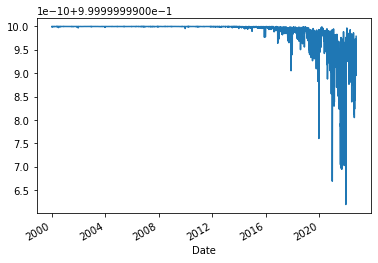

In [20]:
df_microsoft_After2000.corrwith(df_apple_After2000, axis = 1).plot()

<AxesSubplot:xlabel='Date'>

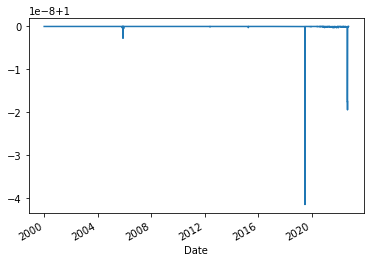

In [21]:
df_microsoft_After2000.corrwith(df_nasdaq_After2000, axis = 1).plot()

<AxesSubplot:xlabel='Date'>

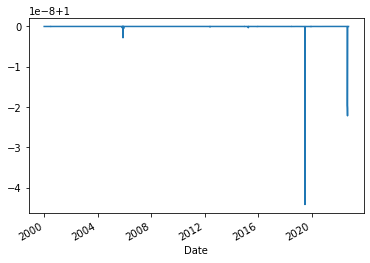

In [22]:
df_apple_After2000.corrwith(df_nasdaq_After2000, axis = 1).plot()

The numerical way to understand the correlation between them is to calculate the correlation coefficient.